In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Evaluating poses
<article class="message">
    <div class="message-body">
        <strong>Overview of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#inspect">Task 1: Visually inspect and compare p…</a>
            </li><li>
            <a href="#dist">Task 2: Calculate pose distance</a>
            </li><li>
            <a href="#comparison">Task 3: Compare poses</a>
            </li>
        </ul>
    </div>
</article>
In this exercise you will compare distances between high-dimensional vectors of human poses (from a dataset of badminton poses). The dataset contains 18 sample poses, each defined by 25 points $(x_i, y_i)$. Your task is to calculate the Euclidean distance ($L_2$-norm) between all poses.
The dataset is loaded and stored in an $18\times 50$-dimensional Numpy array:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

poses = np.load("data/poses.npy")

Each row in `poses`
 has the form $x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}$, i.e. it is a list of $50$ elements constituting $25$ points:


In [2]:
# Get the first pose and print it
poses[0]

array([-27.99571178,  -6.48683038,  -0.11660905,  -1.17064333,
         0.84333174,  -1.17055863,   1.40324612,  -0.75536782,
         1.64424262,  -0.39685233,  -0.91658014,  -1.19784466,
        -1.47706657,  -0.75565014,  -1.63809865,  -0.67290277,
        -0.0346016 ,  -0.2573026 ,   0.52441385,  -0.28487094,
         0.92472628,   0.2406497 ,   1.08637127,   0.87586495,
        -0.35960773,  -0.2296778 ,  -0.75350502,   0.46266449,
        -0.75767282,   1.26336037, -27.99571178,  -6.48683038,
       -27.99571178,  -6.48683038,   0.4412623 ,  -1.52924351,
        -0.43720223,  -1.53048571,  -1.23831741,   1.26319098,
        -1.39460965,   1.34502082,  -0.67480729,   1.34740641,
         0.68458786,   1.12472817,   1.08424651,   1.09708925,
         1.16224962,   0.93142511])

_Note that the output above is still a 1d array, it is simply printed over multiple lines_
The following cell contains as set of helper functions for plotting the poses. You do not need to study these - simply skip to the next section:


In [3]:
def limb_number_plot(s_pose_x,s_pose_y,n1,n2,c="red",label=None,axis = None):
  if label is not None:
    if (s_pose_x[n1]>-10.0) and (s_pose_x[n2]>-10.0) and (s_pose_y[n1]>-10.0) and (s_pose_y[n2]>-10.0): 
        axis.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-",label=label)
  else:
    if (s_pose_x[n1]>-10.0) and (s_pose_x[n2]>-10.0) and (s_pose_y[n1]>-10.0) and (s_pose_y[n2]>-10.0): 
        axis.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-")

def plot_single_pose(s_pose, a, c = "darkgreen", label=None, head = True):
    s_pose_x=s_pose[::2]
    s_pose_y=s_pose[1::2]
    limb_number_plot(s_pose_x,s_pose_y,2,5,c,axis=a)
    if label is not None:

        limb_number_plot(s_pose_x,s_pose_y,9,12,c,label,axis=a)
    else:
        limb_number_plot(s_pose_x,s_pose_y,9,12,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,2,9,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,5,12,c,axis=a)

    limb_number_plot(s_pose_x,s_pose_y,2,3,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,3,4,c,axis=a)

    limb_number_plot(s_pose_x,s_pose_y,5,6,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,6,7,c,axis=a)

    #left leg / foot
    limb_number_plot(s_pose_x,s_pose_y,9,10,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,10,11,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,11,22,c,axis=a)

    #right leg / foot
    limb_number_plot(s_pose_x,s_pose_y,12,13,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,13,14,c,axis=a)
    limb_number_plot(s_pose_x,s_pose_y,14,19,c,axis=a)

    # head
    if head:
        limb_number_plot(s_pose_x,s_pose_y,0,15,c,axis=a)
        limb_number_plot(s_pose_x,s_pose_y,0,16,c,axis=a)

        limb_number_plot(s_pose_x,s_pose_y,15,17,c,axis=a)
        limb_number_plot(s_pose_x,s_pose_y,16,18,c,axis=a)
    return True 

The cell below visualises each pose in the dataset:


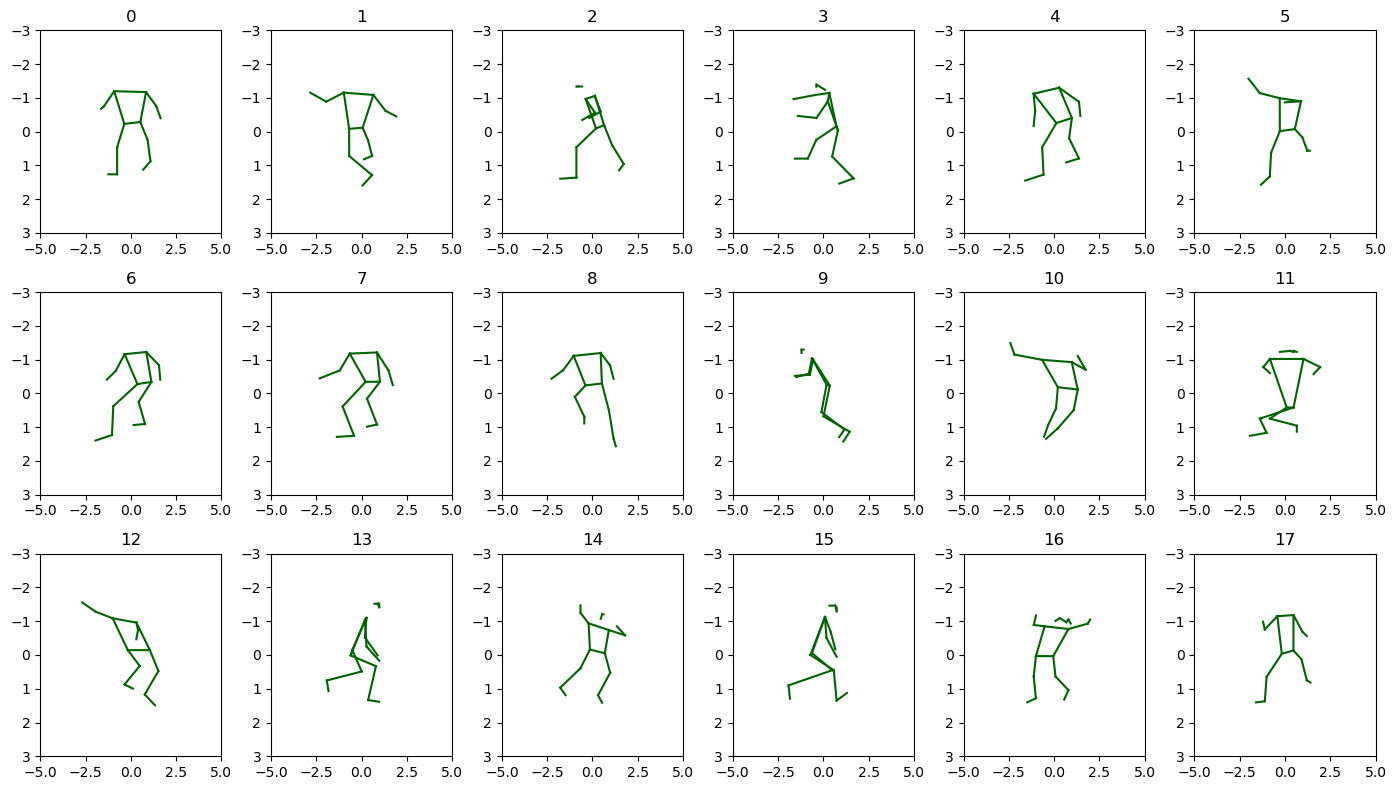

In [4]:
# Create a 6x3 grid of subplots
fig, ax = plt.subplots(3, 6, figsize=(14, 8))

for i, p in enumerate(poses):
    axis = ax[i//6, i%6] # Select the appropriate subplot
    plot_single_pose(p, axis)

    axis.set_title(i)
    axis.set_xlim(-5, 5)
    axis.set_ylim(3,-3)


plt.tight_layout()


---
**Task 1 (easy): Visually inspect and compare poses💡**
This task only involves visual inspection of the poses.
1. Choose the three pairs of poses that look most similar and note their indices.
2. Choose the three pairs of poses that look least similar and note their indices.


---

---
**Task 2 (easy): Calculate pose distance👩‍💻**
In this task you will calculate the Euclidean distance ($L_2$ norm) between all the poses (note that the distance is symmetric, such that the distance between pairs (a, b) and (b, a) are the same).
1. In the cell below, calculate the Euclidean distance between each combination of poses and store the result in an $18\times 18$ matrix called `res`
 (the name is important as the variable is used below) such that the distance between `poses[i]`
 and `poses[j]`
 is in position $i, j$ in the matrix.


---


In [7]:
# Write your solution here
res = []
for i in range(18):
    row = []
    for j in range(18):
        row.append(np.linalg.norm(poses[j]-poses[i]))
    
    res.append(row)


The following cell creates a visualization of the 18x18 distance matrix you created above:


<Axes: >

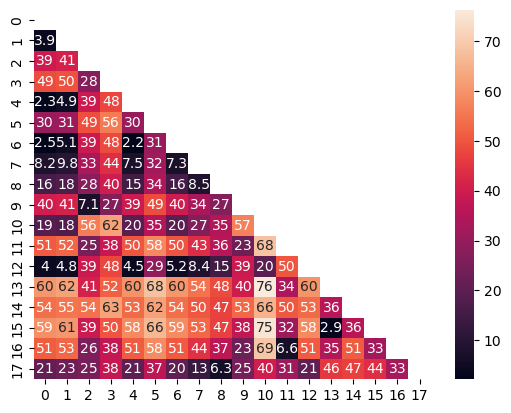

In [8]:
import seaborn as sns
t = np.triu(np.ones_like(res))
sns.heatmap(res, annot=True, mask=t)


---
**Task 3 (medium): Compare poses👩‍💻**
1. Determine the three most similar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them using the plotting function `plot_pair`
 below.
2. Determine the three most dissimilar pose-pairs using the distances calculated in the distance matrix `res`
 and plot them.
3. Compare the pose-pairs you chose in [Task 1](#inspect) with the calculated pose-pairs. How well did your intuition match the calculated result?


---


In [9]:
def plot_single(ax, i, p):
    ax.scatter(p[:, 0], p[:, 1]) # Plot the pose coordinates

    ax.set_title(i)
    ax.set_xlim(-5, 5)
    ax.set_ylim(3,-3)

def plot_pair(a, b):
    """Plot two poses side by side. a and b are indices.
    """
    fig, ax = plt.subplots(1, 2)

    ap = poses[a]
    bp = poses[b]

    plot_single_pose(ap, ax[0])
    plot_single_pose(bp, ax[1])
    #plot_single(ax[0], a, ap)
    #plot_single(ax[1], b, bp)



[(2.2114718226569177, (4, 6)), (2.297434201974493, (0, 4)), (2.5004651789651158, (0, 6)), (2.892157299602328, (13, 15)), (3.9489455496391854, (0, 1)), (3.9887685126942247, (0, 12)), (4.455083030869159, (4, 12)), (4.8450787163935916, (1, 12)), (4.853878792030019, (1, 4)), (5.100576600408077, (1, 6)), (5.152286338185954, (6, 12)), (6.255352851151656, (8, 17)), (6.620527822191326, (11, 16)), (7.140439967492628, (2, 9)), (7.297323156563838, (6, 7)), (7.511881868465199, (4, 7)), (8.186649184018577, (0, 7)), (8.388105742971756, (7, 12)), (8.474499775320377, (7, 8)), (9.801933633598193, (1, 7)), (13.485644403406939, (7, 17)), (15.375324975251168, (8, 12)), (15.440285215087892, (4, 8)), (15.528007572861696, (6, 8)), (16.041945972741537, (0, 8)), (17.526460921810365, (1, 8)), (17.735282951185518, (1, 10)), (18.85450143647272, (0, 10)), (19.581930553219614, (10, 12)), (19.743785211797267, (4, 10)), (19.781875189051682, (6, 10)), (20.450627389578262, (6, 17)), (20.54717690044777, (4, 17)), (20.87

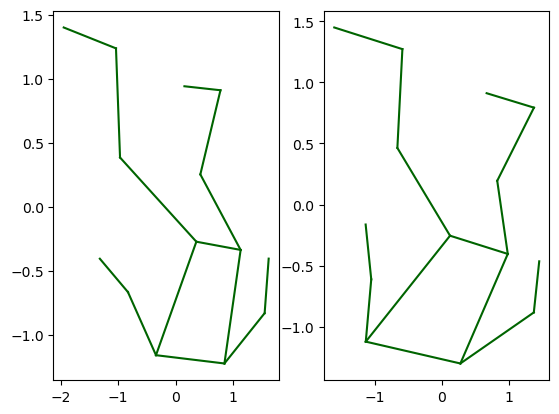

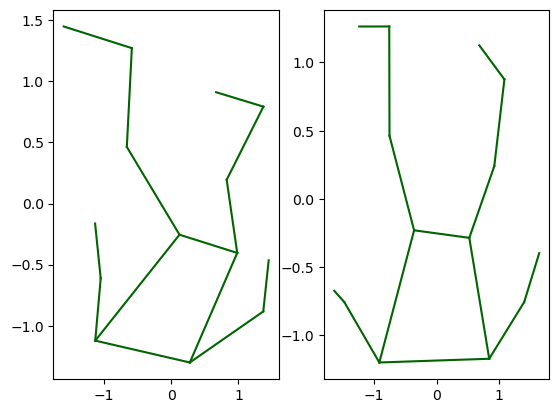

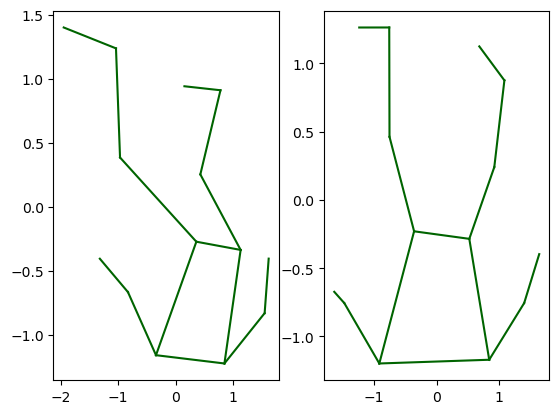

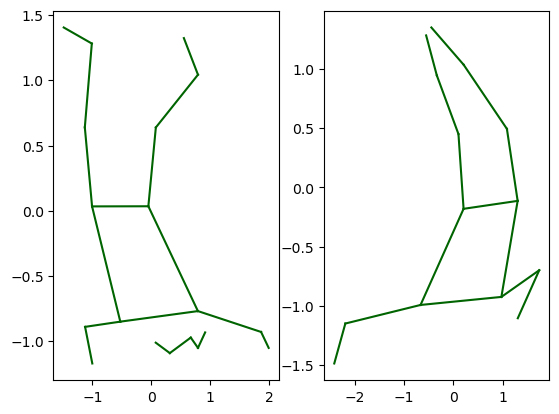

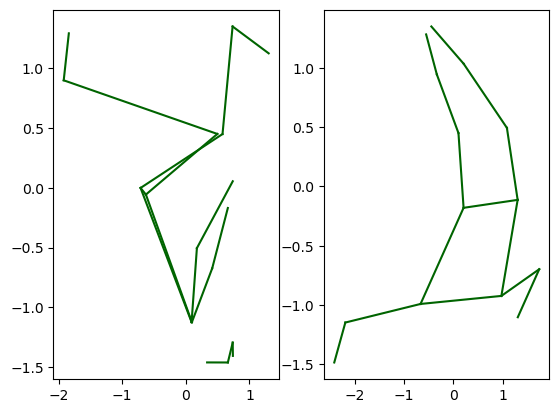

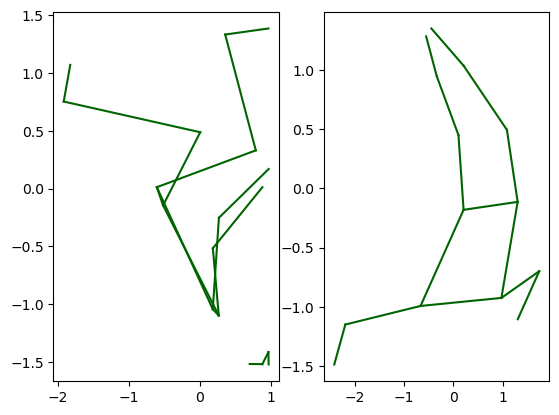

In [27]:
from itertools import combinations

def dist_get(a):
    return a[0]

nums = [a for a in range(18)]
comb = list(combinations(nums, 2))
distances = []

for _,p in enumerate(comb):
    dist = res[p[0]][p[1]]
    distances.append((dist, p))

distances.sort(key=dist_get)
print(distances)

for i in range(3):
    pics = distances[i][1]
    plot_pair(pics[1], pics[0])

for _, i in enumerate(distances[-3:]):
    pics = i[1]
    plot_pair(pics[1], pics[0])
